# Final Project - Constrained, Multi-Objective, & Non-Linear Least Squares
### Modeling & Optimization
### Ethan Witkowski

## Part I

### 13.5

a)
<br>

$A = $
$ \left(\begin{array}{cc} 
1 & x_1^{(1)} & x_2^{(1)} & x_3^{(1)} & x_1^{2(1)} & x_2^{2(1)} & x_3^{2(1)} & x_1 x_2^{(1)} & x_1 x_3^{(1)} & x_2 x_3^{(1)}\\ 
1 & x_1^{(2)} & x_2^{(2)} & x_3^{(2)} & x_1^{2(2)} & x_2^{2(2)} & x_3^{2(2)} & x_1 x_2^{(2)} & x_1 x_3^{(2)} & x_2 x_3^{(2)}\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
1 & x_1^{(N)} & x_2^{(N)} & x_3^{(N)} & x_1^{2(N)} & x_2^{2(N)} & x_3^{2(N)} & x_1 x_2^{(N)} & x_1 x_3^{(N)} & x_2 x_3^{(N)}
\end{array}\right)
$

b)
<br>

$p = 10$
<br>

$f_1(x) = 1$
<br>
$f_2(x) = x_1$
<br>
$f_3(x) = x_2$
<br>
$f_4(x) = x_3$
<br>
$f_5(x) = x_1^2$
<br>
$f_6(x) = x_2^2$
<br>
$f_7(x) = x_3^2$
<br>
$f_8(x) = x_1 x_2$
<br>
$f_9(x) = x_1 x_3$
<br>
$f_{10}(x) = x_2 x_3$



### 13.9

a)
<br>

As the RMS test error for each model in the cross-validation is similar, when fit on new data, I expect the model to perform similarly to the models in the cross-validation. Because the cross-validation RMS test errors are similar, I assume the models did not over-fit, and that new data will be similar to data seen in cross-validation.

b)
<br>

The cross-validation producing similar parameter values indicates stability, and enhances my confidence in the model. Instead of using the fold 3 model, I would fit a model over all the data, or use the average of the coefficients for all of the models.

### 15.1

$J = \lambda_{1}J_{1} + \lambda_{2}J_{2} + ... + \lambda_{k}J_{k}$ 
<br>

Given $J_{i} = (x-b_{i})^2$
<br>

$J = \lambda_{1}(x-b_{1})^2 + \lambda_{2}(x-b_{2})^2 + ... + \lambda_{k}(x-b_{k})^2$ 
<br>

Without weighting, the function output is the b-vector, therefore the closest approximation is the average of the b-vector.
<br>

Given weighting, 
<br>

$\hat{x} = \sum_{i=1}^{k} w_{i}b_{i}$
<br>

with $w_{i} = \cfrac{\lambda{i}}{k \times \sum_{i=1}^{k} \lambda_{i}}$

### 15.4

Given $A_i ... A_K$ and $J_{i} = \|A_{i}x - b\|^2$
<br>

$x^{rob} = \lambda_{1}(A_{1})^{-1}b + ... + \lambda_{K}(A_{K})^{-1}b$
<br>

with $\lambda_{i} = 1 - J_{i}$
<br>

For $K=1$, we assume $J=0$, as $A{_1} = A$
<br>

Therefore, $x^{rob} = (A_{1})^{-1}b$

### 15.6

Given:
<br>

$D = $ 
$\left(\begin{array}{cc} 
-1 & 1 & 0 & 0\\ 
0 & -1 & 1 & 0\\
0 & 0 & -1 & 1 
\end{array}\right)$
<br>

Therefore, $D\vec{1} = \vec{0}$
<br>

$A = $
$\left(\begin{array}{cc} 
a_{1,1} & \dots & \dots & a_{1,n}\\ 
\vdots & \vdots & \vdots & \vdots\\ 
a_{m,1} & \dots & \dots & a_{m,n}\\
\end{array}\right)$

$Stack = $
$\left(\begin{array}{cc} 
a_{1,1} & \dots & \dots & a_{1,n}\\ 
\vdots & \vdots & \vdots & \vdots\\ 
a_{m,1} & \dots & \dots & a_{m,n}\\ 
-1 & 1 & 0 & 0\\ 
0 & -1 & 1 & 0\\
0 & 0 & -1 & 1 
\end{array}\right)$
<br>

If and only if $A\vec{1} = \vec{0}$, then $Stack\vec{1} = \vec{0}$, and the columns of $Stack$ are linearly dependent.
<br>

Conversely, if and only if $A\vec{1} \neq \vec{0}$, then the columns of $Stack$ are linearly independent.


### 16.11

Substitute $\|y\|$ in for $\|x-a\|$ 
<br>

Therefore, $x=y+a$ and $Cx=d$ becomes $Cy=d-Ca$
<br>

Then, $y=C^{\dagger}(d-Ca)$
<br>

Substitute $x-a=C^{\dagger}(d-Ca)$
<br>

Lastly, $\hat{x} = a - C^{\dagger}(Ca-d)$


## Part II

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.linalg import block_diag
import pandas as pd

### 13.3

a)

In [53]:
#Define data values - number of transistors, year
Years = np.array([1971, 1972, 1974, 1978, 1982, 1985, 1989, 1993, 1997, 1999, 2000, 2002, 2003])
Transistors = np.array([2250, 2500, 5000, 29000, 120000, 275000, 1180000, 3100000, 7500000, 24000000, \
                        42000000, 220000000, 410000000])

#Take log of number of transistors
Transistors = np.log(Transistors)

Least Squares Solution:
<br>

$\hat{\theta} = (A^{T}A)^{-1}A^{T}y^{d}$

Root Mean Square Error:
<br>

$RMSE = \sqrt{\cfrac{\|y^{d}-A\theta\|^{2}}{N}}$

In [54]:
#Define A matrix

#Pre-allocate A
A = np.empty([len(Years), 2])

#Place in time series data
for i,year in enumerate(Years):

    A[i] = np.array([1, year])

In [55]:
#Define observed y

#Pre-allocate obeserved y
y_d = np.empty([len(Transistors), 1])

#Place in actual transistor data
for i,transistor in enumerate(Transistors):

    y_d[i] = np.array([transistor])

In [56]:
#Least Squares Solution

LS_step_1 = np.linalg.inv(np.matmul(np.transpose(A), A))

LS_step_2 = np.matmul(LS_step_1, np.transpose(A))

LS_step_3 = np.matmul(LS_step_2, y_d)

theta_hat = LS_step_3

In [57]:
#Prediction values 

Years = np.array([1971, 1972, 1974, 1978, 1982, 1985, 1989, 1993, 1997, 1999, 2000, 2002, 2003])
LS_transistor = np.empty([len(Years)])

for i,year in enumerate(Years):

    LS_transistor[i] = (theta_hat[0][0])+((theta_hat[1][0])*(year))

In [58]:
#Root Mean Square Error

#Number of observations
N = len(Transistors)

#RSME calculation
rmse = np.sqrt(np.linalg.norm(LS_transistor - Transistors) / N)

RMS minimizing $\theta_{1} = -691.44$
<br>

RMS minimizing $\theta_{2} = 0.355$
<br> 

RMS error $= .360$

<function matplotlib.pyplot.show(*args, **kw)>

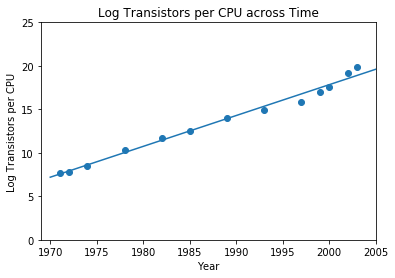

In [59]:
#Plotting data and prediction

#Continuous time, pre-allocation
continuous_year = np.arange(1970,2020)
LS_cont_transistor = np.empty([len(continuous_year)])

#Prediction
for j,cont_year in enumerate(continuous_year):

    LS_cont_transistor[j] = (theta_hat[0][0])+((theta_hat[1][0])*(cont_year))
    
#Plotting
plt.scatter(Years, Transistors)
plt.xlabel('Year')
plt.ylabel('Log Transistors per CPU')
plt.title('Log Transistors per CPU across Time')
plt.xlim([1969,2005])
plt.ylim([0,25])

plt.plot(continuous_year, LS_cont_transistor)
plt.show

b)

In [60]:
#Prediction for 2015

#Declare year, pre-allocation
year_2015 = np.array([2015])
LS_2015_transistor = np.empty([len(year_2015)])

#Prediction 2015
for k,year in enumerate(year_2015):

    LS_2015_transistor[k] = (theta_hat[0][0])+((theta_hat[1][0])*(year))

#Reverse logarithmic transformation
LS_2015_transistor = np.exp(LS_2015_transistor)

The predicted number of transistors per CPU in 2015 is $1.14 \times 10^{10}$. The predicted value is $7.4 \times 10^{9}$ transistors per CPU greater than the actual number of transistors per CPU in 2015, $4 \times 10^{9}$.

c)

In [61]:
#Reverse logarithmic transformation of theta_2
actual_theta_2 = np.exp(theta_hat[1][0])
print(actual_theta_2)

1.4256672716945757


The least squares model predicts the number of transistors per CPU will be multiplied by 1.43 each year. This is lower than Moore's Law, which predicts the doubling of transistors per CPU each year.

### 16.5)

In [62]:
#Generate random 20x10 matrix A, random 5x10 matrix C
A = np.random.randint(10, size=(20, 10))
C = np.random.randint(10, size=(5, 10))

#Generate vectors b,d
b = np.random.randint(10, size=(20, 1))
d = np.random.randint(10, size=(5, 1))

a)

KKT equation:
<br>

$\left(\begin{array}{cc} 
2A^{T}A & C^T\\
C & 0
\end{array}\right)
$
$\left(\begin{array}{cc} 
\hat{x}\\
\hat{z}
\end{array}\right)
$
$=$
$\left(\begin{array}{cc} 
2A^{T}b\\
d
\end{array}\right)
$
<br>


In [12]:
#Element 0,0 in KKT Matrix
A_T_A2 = np.matmul((2*(np.transpose(A))),A)

#Element 0,1 in KKT Matrix
C_T = np.transpose(C)

#Element 0 in KKT vector
A_T_b2 = np.matmul((2*(np.transpose(A))),b)

#Create KKT matrix
KKT_matrix = np.block([[A_T_A2, C_T], [C, np.zeros((5,5))]])

#Create KKT vector
KKT_vector = np.block([[A_T_b2],[d]])

#Use np.solve to solve for x,z
x_z = np.linalg.solve(KKT_matrix, KKT_vector)

In [13]:
#x_hat is a 10x1 vector, given Cx=d

x_hat = x_z[0:10]
print(x_hat)

[[-0.08922481]
 [ 0.20215763]
 [-0.13884004]
 [-0.5102118 ]
 [ 0.59119042]
 [ 0.62632265]
 [-0.55435063]
 [ 1.04348676]
 [ 0.01789043]
 [-0.25302692]]


b)

In [14]:
#Test if Cx-d is nearly zero
C_x = np.matmul(C,x_hat)

C_x_d = np.subtract(C_x, d)
print(C_x_d)

#Cx-d is nearly zero

[[ 8.88178420e-16]
 [-7.99360578e-15]
 [-8.88178420e-16]
 [ 2.66453526e-15]
 [-1.06581410e-14]]


c)

Least Norm Equation:
<br>

$\left(\begin{array}{cc} 
2I & C^T\\
C & 0
\end{array}\right)
$
$\left(\begin{array}{cc} 
\hat{x}\\
\hat{z}
\end{array}\right)
$
$=$
$\left(\begin{array}{cc} 
0\\
d
\end{array}\right)
$
<br>


In [15]:
#Element 0,0 in x^ln KKT matrix
I_2 = 2*(np.identity(10))

#Least norm matrix x^ln
least_norm_matrix = np.block([[I_2, C_T],[C, np.zeros((5,5))]])

#Least norm vector x^ln
least_norm_vector = np.block([[np.zeros((10,1))],[d]])

#Solve for least norm solution x^ln
least_norm_sol = np.linalg.solve(least_norm_matrix, least_norm_vector)

In [16]:
#x^ln is a 10x1 vector, given Cx=d
ln_x_hat = least_norm_sol[0:10]
print(ln_x_hat)

[[ 0.09641489]
 [ 0.08682662]
 [-0.34661219]
 [-0.78011606]
 [ 0.36127314]
 [ 0.54592554]
 [ 0.11021817]
 [ 0.5162268 ]
 [ 0.17428268]
 [-0.28202388]]


d)

In [17]:
#Confirm least squares x^ln is greater than x_hat

def ls_x_hat(A, b, x):

    #Compute A times x
    A_x = np.matmul(A,x)

    #Compute Ax-b
    A_x_b = A_x - b

    #Compute norm of Ax-b
    norm_x_hat = np.linalg.norm(A_x_b,axis=0)

    #Compute square of norm of Ax-b
    sq_norm_x_hat = (norm_x_hat)**2
    
    return sq_norm_x_hat

In [18]:
#Least squares x^hat
ls_x_hat(A, b, x=x_hat)

array([370.85716847])

In [19]:
#Least squares x^ln (least norm)
ls_x_hat(A, b, x=ln_x_hat)

array([564.99662048])

In [20]:
#It is confirmed - least squares x^ln is greater than least squares x^hat

### 17.6

a)

In [21]:
#Declare change matrices
A = np.matrix([[.99, .03, -.02, -.32],[.01, .47, 4.7, 0],[.02, -.06, .4, 0],[.01, -.04, .72, .99]])
B = np.matrix([[.1, .99],[-3.44, 1.66],[-.83, .44],[-.47, .25]])

In [22]:
#Function to iterate x to next state using matrix A, matrix B, and u

def update_x(x_current):
    
    x_next = (A*x_current) + (B*u_vector)
    
    return x_next

In [23]:
#Function to iterate x over specified time

def state_traj(time_iter, x_current):
    
    for iter in range(time_iter):
        
        #Run update_x using the final element in each x_current column
        x_next = update_x(x_current[:,-1])
        
        #Concatenate most current x-state to x_current
        x_current = np.concatenate((x_current, x_next), axis=1)
        
    x_final = x_current[:,-1]
    print(x_final)
    
    return x_final,x_current

In [24]:
#Input initial x-state, u-vector and final time iteration
x_current = np.matrix([[0],[0],[0],[1]])

u_vector = np.matrix([[0],[0]])

time_iter = 120

In [25]:
#Simulate Open Loop Trajectory

x_final, x_current = state_traj(time_iter, x_current)

[[-1.56527465]
 [-0.28557245]
 [-0.02613494]
 [-0.25404265]]


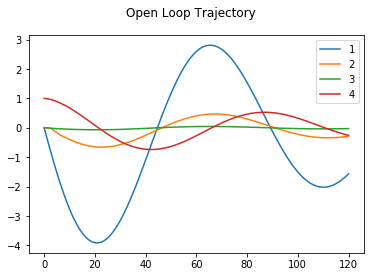

In [26]:
#Plot linear dynamical system

plt.figure()
for i in range(x_current.shape[0]):
    plt.plot(np.transpose(x_current[i,:]), label = i+1)
    
plt.legend()
plt.suptitle('Open Loop Trajectory')

plt.show()

b)

In [27]:
#len_x = n, len_u = m
len_x = 4
len_u = 2

#Declare input variables
rho = 100
T = 100
C = np.identity(len_x)

#inital x
x_init = np.array([[0],[0],[0],[1]])

#destination x
x_des = np.array([[0],[0],[0],[0]])

#len_z = Tn+(T-1)m 
len_z = (T*len_x)+((T-1)*len_u)

In [28]:
#Create A_tilde

#Create list of C matrices to make C block
C_list = []
for i in range(T):
    C_list.append(C)

#Declare block of C matrices, dimensions must be (n times T by n times T)
C_block = scipy.linalg.block_diag(*C_list)

#variable for sqrt(rho)I; I has dimensions mxm
sqrt_rho_I = np.dot((np.sqrt(rho)),(np.identity(len_u)))

#Declare list of sqrt_I_rho matrices to make block
sqrt_rho_I_list = []
for j in range((T-1)):
    sqrt_rho_I_list.append(sqrt_rho_I)

#Declare block of sqrt_I_rho matrices, dimensions must be (m times T-1 by m times T-1) 
block_sqrt_rho_I = scipy.linalg.block_diag(*sqrt_rho_I_list)

#Declare top right zeros matrix
top_r_A_tilde = np.zeros((400, 198))

#Declare bottom left zeros matrix
bottom_l_A_tilde = np.zeros((198, 400))

#Create A_tilde
A_tilde = np.block([[C_block, top_r_A_tilde],[bottom_l_A_tilde, block_sqrt_rho_I]])

In [29]:
#Create C tilde

#Create C tilde top left matrix
top_l_C_tilde = np.zeros((396,400))

subset = np.array([[.99,.03,-.02,-.32,-1,0,0,0],[.01,.47,4.7,0,0,-1,0,0], \
                   [.02,-.06,.4,0,0,0,-1,0],[.01,-.04,.72,.99,0,0,0,-1]])

for i in range(0, len(top_l_C_tilde), 4):
    top_l_C_tilde[i:i+4, i:i+8] = subset

#Create C tilde bottom left
bot_l_C_tilde = np.zeros((194,400))

for i,val in enumerate(range(4)):
    bot_l_C_tilde[i, i] = 1

#for j,val_2 in enumerate(range(190,194)):
#    bot_l_C_tilde[j, j+206] = 1

bot_l_C_tilde[190, 396] = 1
bot_l_C_tilde[191, 397] = 1
bot_l_C_tilde[192, 398] = 1
bot_l_C_tilde[193, 399] = 1

#Create C tilde bottom right
bot_r_C_tilde = np.zeros((194,198))

#Create C tilde top right
B_list = []
for i in range(T-1):
    B_list.append(B)

top_r_C_tilde = scipy.linalg.block_diag(*B_list)

#Create C_tilde
C_tilde = np.block([[top_l_C_tilde, top_r_C_tilde],[bot_l_C_tilde, bot_r_C_tilde]])

In [30]:
#Create b tilde
b_tilde = np.zeros(((len(np.transpose(A_tilde)),1)))

In [31]:
#Create d tilde
d_tilde = np.zeros(((len(C_tilde),1)))

d_tilde[582:586,:] = x_init
d_tilde[586:590,:] = x_des

KKT equations:
<br>

$\left(\begin{array}{cc} 
2\tilde{A}^{T}\tilde{A} & \tilde{C}^T\\
\tilde{C} & 0
\end{array}\right)
$
$\left(\begin{array}{cc} 
\hat{x}\\
\hat{u}
\end{array}\right)
$
$=$
$\left(\begin{array}{cc} 
2\tilde{A}^{T}\tilde{b}\\
\tilde{d}
\end{array}\right)
$
<br>

In [32]:
#Element 0,0 in KKT Matrix
A_tilde_T_A_tilde_2 = np.matmul((2*(np.transpose(A_tilde))),A_tilde)

#Element 0,1 in KKT Matrix
C_tilde_T = np.transpose(C_tilde)

#Element 0 in KKT vector
A_tilde_T_b_tilde_2 = np.matmul((2*(np.transpose(A_tilde))),b_tilde)

#Create KKT matrix
KKT_matrix_2 = np.block([[A_tilde_T_A_tilde_2, C_tilde_T], [C_tilde, np.zeros((590,590))]])

#Create KKT vector
KKT_vector_2 = np.block([[A_tilde_T_b_tilde_2],[d_tilde]])

#Use np.solve to solve for z tilde
#z_tilde = np.linalg.solve(KKT_matrix_2, KKT_vector_2)

In [33]:
#Unable to rectify singularity error when computing z_tilde
#Therefore, use external KKT matrix to continue with analysis
KKT_matrix_2_check = np.load('KKT.npy')

In [34]:
#Create KKT vector
KKT_vector_2_check = np.zeros(((1002,1)))
KKT_vector_2_check[994:998,:] = x_init
KKT_vector_2_check[998:1002,:] = x_des

In [35]:
#Solve KKT equation
z_tilde = np.linalg.solve(KKT_matrix_2_check, KKT_vector_2_check)

In [36]:
#Define x solution 
x_sol = z_tilde[0:400,:]

In [37]:
#Split x solution across values
sol_array = []
for i in range(4):
    append_sol = [x_sol[idx][0] for idx in range(0+i, len(x_sol), 4)]
    sol_array.append(append_sol)

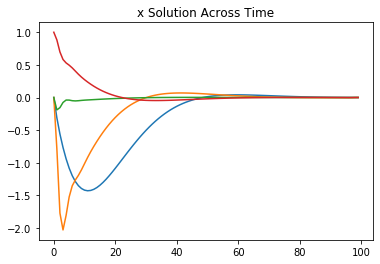

In [38]:
#Plot x solution across time
plt.figure()

for i in range(4):
    plt.plot(range(len(sol_array[i])),sol_array[i])
    
plt.title('x Solution Across Time')

plt.show()

In [39]:
#Define u solution 
u_sol = z_tilde[400:598,:]

In [40]:
#Split u solution across 4 values
u_sol_array = []
for i in range(4):
    append_sol = [u_sol[idx][0] for idx in range(0+i, len(u_sol), 4)]
    u_sol_array.append(append_sol)

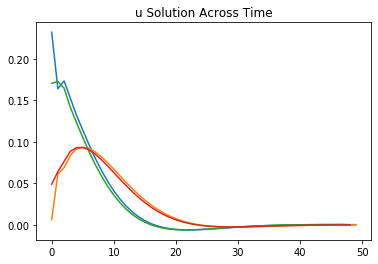

In [41]:
#Plot u solutions across time
plt.figure()

for i in range(4):
    plt.plot(range(len(u_sol_array[i])),u_sol_array[i])
    
plt.title('u Solution Across Time')

plt.show()

c)

In [42]:
#Find K by solving KKT equation for x_1 = e1, e2, e3, e4
#Create K state feedback by taking first and second element in u, (z=400,401), for each basis vector, \
#and placing in K columns

#Create K state feedback
K_state_feedback = np.empty([2,4])

#Basis 4
K_col_4 = u_sol[0:2,:]
K_state_feedback[0,0]=K_col_4[0][0]
K_state_feedback[1,0]=K_col_4[1][0]

#Basis 3
#KKT vector basis 3
KKT_vector_2_check[998:1002,:] = np.array([[0],[0],[1],[0]])

#Solve for basis 3
z_tilde = np.linalg.solve(KKT_matrix_2_check, KKT_vector_2_check)
K_col_3 = z_tilde[400:402,:]
K_state_feedback[0,1]=K_col_3[0][0]
K_state_feedback[1,1]=K_col_3[1][0]

#Basis 2
#KKT vector basis 2
KKT_vector_2_check[998:1002,:] = np.array([[0],[1],[0],[0]])

#Solve for basis 2
z_tilde = np.linalg.solve(KKT_matrix_2_check, KKT_vector_2_check)
K_col_2 = z_tilde[400:402,:]
K_state_feedback[0,2]=K_col_2[0][0]
K_state_feedback[1,2]=K_col_2[1][0]

#Basis 1
#KKT vector basis 1
KKT_vector_2_check[998:1002,:] = np.array([[1],[0],[0],[0]])

#Solve for basis 1
z_tilde = np.linalg.solve(KKT_matrix_2_check, KKT_vector_2_check)
K_col_1 = z_tilde[400:402,:]
K_state_feedback[0,3]=K_col_1[0][0]
K_state_feedback[1,3]=K_col_1[1][0]

print(K_state_feedback)

[[0.23209177 0.23200751 0.23214315 0.23212416]
 [0.00630401 0.0063299  0.00626438 0.00641365]]


### 18.1

a)

The Levenberg-Marquardt update is $ x^{k + 1 } =  x^{k} - \frac{ f'(x^k ) }{ \lambda ^ k + (f'(x^k))^2 } f(x^k)$ 
<br>

Given $f(x) = xe^{x} - u$ and $f'(x) = e^{x} + xe^{x}$
<br>
                                                          
The Levenberg-Marquardt update is $ x^{k + 1 } =  x^{k} - \frac{ e^{x^k} + x^ke^{x^l} }{ \lambda ^ k + ( e^{x^k} + x^ke^{x^l} )^2 } x^ke^{x^k}$

b)

In [43]:
#Taylor approximation function
def taylor_approximate(x_k, value):
    return x_k * np.exp(x_k) - value

#Levenberg-Marquardt update function
def update_function(x_k, x_init, value, lambda_error):

    #Approximate function at x_k
    function_x_k  = taylor_approximate(x_k, value)

    #Take derivative at x_k
    derivative_x_k = x_k * np.exp(x_k) +  np.exp(x_k)

    #Use Levenberg-Marquardt formula to update
    evaluate = (derivative_x_k / (lambda_error + (derivative_x_k)**2 )) * function_x_k

    #x^(k+1)
    x_k_next  = x_k - evaluate

    return x_k_next

In [44]:
#Function minimizes f(x)^2 to compute Lambert W-function

def Compute_W(value):
    
    #Initalize values
    x_init  = 1
    lambda_init = 1
    threshold = (10)**(-6)

    #Evaluates function at previous value
    eval_prev =  update_function(x_init, x_init, value, lambda_init)
    
    #Evaluates function at current value
    eval_next = update_function(x_init, x_init, value, lambda_init)

    #Run algorithm
    while True:

        #Calculate norm of previous value of x_k
        prev_norm = np.linalg.norm(taylor_approximate(eval_prev, value))
        
        #Update using Levenberg-Marquardt
        eval_next = update_function(eval_prev, x_init, value, lambda_init)

        #Calculate norm with current value of x_k
        current_norm = np.linalg.norm(taylor_approximate(eval_next, value))

        #Evaluate norm values
        if current_norm > prev_norm:
            
            #Keep evaluation
            eval_next = eval_prev
            
            #Increase lambda (times 2)
            lambda_init *= 2.0

        else:
            #Replace with new evaluation
            eval_prev = eval_next
            
            #Decrease lambda (times. 8)
            lambda_init *= 0.8

        #If below threshold, return evaluation
        if current_norm <= threshold:
            return eval_next

In [45]:
#Computation of Lambert W-function for value of 1
LM_imp_test = Compute_W(value = 1)

#Evaluate Lambert W-function
LM_imp_test_eval = (LM_imp_test * np.exp(LM_imp_test))

print('Computation:')
print(LM_imp_test)
print('Evaluation of function:')
print(LM_imp_test_eval)

Computation:
0.5671433135310934
Evaluation of function:
1.0000000638893316


### 18.4


Given
$\theta_k $ of two terms,
<br>

Theta coefficient update is  $\theta_{k + 1} = \theta_k -  ( J f(x, \theta_k) ^T  Jf(x, \theta_k) )
(Jf(x, \theta_k)^T Jf(x, \theta_k) + \lambda I )^{-1} $ 

In [46]:
#Function that evaluates the exponential function
def exp_function(theta1, theta2, x_val, y_val):
    func_value = theta1 * np.exp(theta2 * x_val) - y_val
    return func_value

#Function that takes derivative of exponential function
def derivative_exp_function(theta1, theta2, x_val):
    deriv_theta_1 = np.exp(theta2 * x_val)
    deriv_theta_2 = theta1 * x_val * np.exp(theta2 * x_val)
    return np.array([deriv_theta_1,deriv_theta_2])

In [47]:
def LM_fit(theta_1 = 1, theta_2 = 1):

    #Initialize values
    
    #Threshold
    threshold = (10)**(-6)
    
    #Vector of theta coefficients
    thetas = np.array([theta_1, theta_2])
    
    #values of x
    x_data = [5.2, 4.5, 2.7, 2.5, 2.1, 1.9]
    
    #Number of dimensions
    num_dim = len(x_data)
    
    #Lambda error
    lambda_error = 1
    
    #Pre-allocate residual values and Jacobian matrix
    resid = []
    Jacobian_matrix = []
    
    for iter in range(num_dim):
        resid.append(0)
        Jacobian_matrix.append(None)
    
    #Algorithm stopping counter
    stopping_counter = 0

    #Calculate residual value and Jacobian vector for each value of x
    for x_iter, observation in enumerate(x_data):
        resid[x_iter] = exp_function(theta_1, theta_2, x_iter, observation)
        Jacobian_matrix[x_iter] = derivative_exp_function(theta_1, theta_2,  x_iter)
    
    #Transfer to arrays
    resid = np.array(resid)
    Jacobian_matrix = np.array(Jacobian_matrix)
    #Objective terms
    current_norm = np.linalg.norm(resid)

    #Run algorithm
    while True:
        
        #Jacobian calculations
        #Transpose Jacobian matrix
        Jacobian_T = np.transpose(Jacobian_matrix)
        
        #First Jacobian term 
        first_Jacobian_term = np.matmul(Jacobian_T, resid)
        
        #Second Jacobian term
        second_Jacobian_term = np.matmul(Jacobian_T,  Jacobian_matrix) + lambda_error * np.identity(2)
        
        #Inverse of second Jacobian term
        inv_second_Jacobian_term = np.linalg.inv(second_Jacobian_term)
        
        #Matrix multiplication of Jacobian terms
        total_Jacobian_term = np.matmul(inv_second_Jacobian_term, first_Jacobian_term)
        
        #Theta vector for next iteration
        next_theta = thetas - total_Jacobian_term

        #Residual calcuations
        #Residual terms for next iteration
        next_resid = []
        
        #Evaluate exponential function for each x value
        for x_iter, y_val in enumerate(x_data):
            next_resid.append(exp_function(next_theta[0], next_theta[1], x_iter, y_val))
            
        #Format as array
        np.array(next_resid)
        
        #Previous norm
        prev_norm = np.linalg.norm(resid)
        
        #Current norm
        current_norm = np.linalg.norm(next_resid)
        
        #Checks if the previous and current norms are close enough
        if np.around(prev_norm, 4) == np.around(current_norm, 4):
            stopping_counter = stopping_counter + 1
            if stopping_counter == 10:
                return next_theta

        #Given the previous norm is greater than current, update Jacobian and residual
        if current_norm < prev_norm:
            
            #Update Jacobian
            Jacobian_matrix = []
            for x_iter in x_data:
                Jacobian_matrix.append(derivative_exp_function(next_theta[0], next_theta[1], x_iter))
            
            #Transfer to array
            Jacobian_matrix = np.array(Jacobian_matrix)
            
            #Update residual, theta, lambda error
            resid = next_resid
            thetas = next_theta
            lambda_error = lambda_error*0.8
        
        #Return if below threshold
        if current_norm < threshold:
            return next_theta
        
        #if null, increase lambda error
        else:
            lambda_error = lambda_error*2


In [48]:
def LM_fit_plot(thetas = LM_fit(5.2, -1.0)):
    
    #Define x data
    x_data = [5.2, 4.5, 2.7, 2.5, 2.1, 1.9]
    num_dim = len(x_data)
    
    #Iterations counter
    x_iters = []
    for iter in range(num_dim):
        x_iters.append(iter)

    #Predictions
    predicted = []
    for x in x_iters:
        predicted.append(thetas[0] * np.exp(thetas[1] * x))

    #Plotting
    figure, axis = plt.subplots()
    training_data = axis.plot(x_iters, x_data, label='Training Data')
    prediction = axis.plot(x_iters, predicted, label='Prediction')
    axis.legend()
    plt.show()

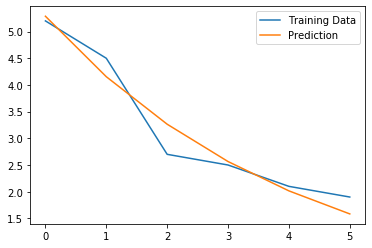

In [49]:
#Plot 
LM_fit_plot()

### 18.8

a)

$\theta = \begin{bmatrix} c_1 & c_2 & r & \delta & \alpha \end{bmatrix}$
<br>

$J_{i,j} = \frac{d \Omega_i(t, \theta_j)}{d \theta^k_j}$ 
<br>

$ J_{i,j} = \begin{bmatrix}
  f_{1i} & f_{2i} & f_{1i} cos(\alpha + t_i) + f_{2i} sin(\alpha + t_i)
   & f_{1i} cos(\alpha - t_i) + f_{2i} sin(\alpha - t_i)
   & (f_{2i} (r cos(\alpha + t) + \delta cos(\alpha - t) )) - (f_{2i}(r sin(\alpha + t) + \delta sin(\alpha - t))
   \end{bmatrix}$ 
<br> 
<br>

$ \theta ^{k + 1} = \theta ^ k - (J_k^T J_k  + \lambda ^ k I)^{-1}  J_k^T r_k $
<br>

b)

In [51]:
#Declare data pairs
obs_data = np.array([[0.5, 1.5],[-0.3, 0.6], [1.0, 1.8], [-0.4, 0.2], [0.2, 1.3], \
                    [0.7, 0.1], [2.3, 0.8], [1.4, 0.5], [0.0 ,0.2], [2.4, 1.7]])

#Initalize values

#Initial values of c1, c2
c_1 = obs_data[:,0]
c_2 = obs_data[:,1]

#Inital value of r
r_init = 1 

#Inital value of delta
delta_init = 0

#Inital value of alpha
alpha_init = 0

#Lambda error
lambda_error = 1

#Declare Jacobian
theta = np.array([c_1, c_2, r_init, delta_init, alpha_init])

In [1]:
'''
def compute_jacobian(theta, obs_data):

    #Pre-allocate Jacobian rows
    Jacobian = np.empty([len(obs_data),1])
    
    for i,row in range(len(Jacobian)):

        #Derivatives of each Jacobian term
        
        #Derivative c_1
        derivative_c_1 = (c_1 + (r_init*np.cos(alpha_init)) + (delta_init * np.cos(alpha_init)) - (obs_data[i][0]))
        
        #Derivative c_2
        derivative_c_2 = (c_2 + (r_init*np.sin(alpha_init) + (delta_init * np.sin(alpha_init)) - (obs_data[i][1]))
        
        #Derivative r
        derivative_r = (derivative_c_1 * np.cos(alpha_init) + derivative_c_2 *np.sin(alpha_init))
        
        #Deriative delta
        deriative_delta = derivative_c_1 * np.cos(alpha_init) + derivative_c_2 *np.sin(alpha_init)
        
        #Derivative alpha
        derivative_alpha = derivative_c_2 * (r_init*np.cos(alpha_init) + delta_init * np.cos(alpha_init) ) - derivative_c_1 * (r_init*np.sin(alpha_init) + delta_init * np.sin(alpha_init))

        row = np.array([derivative_c_1, derivative_c_2, derivative_r, deriative_delta, derivative_alpha])

    return Jacobian
'''    

'\ndef compute_jacobian(theta, obs_data):\n\n    #Pre-allocate Jacobian rows\n    Jacobian = np.empty([len(obs_data),1])\n    \n    for i,row in range(len(Jacobian)):\n\n        #Derivatives of each Jacobian term\n        \n        #Derivative c_1\n        derivative_c_1 = (c_1 + (r_init*np.cos(alpha_init)) + (delta_init * np.cos(alpha_init)) - (obs_data[i][0]))\n        \n        #Derivative c_2\n        derivative_c_2 = (c_2 + (r_init*np.sin(alpha_init) + (delta_init * np.sin(alpha_init)) - (obs_data[i][1]))\n        \n        #Derivative r\n        derivative_r = (derivative_c_1 * np.cos(alpha_init) + derivative_c_2 *np.sin(alpha_init))\n        \n        #Deriative delta\n        deriative_delta = derivative_c_1 * np.cos(alpha_init) + derivative_c_2 *np.sin(alpha_init)\n        \n        #Derivative alpha\n        derivative_alpha = derivative_c_2 * (r_init*np.cos(alpha_init) + delta_init * np.cos(alpha_init) ) - derivative_c_1 * (r_init*np.sin(alpha_init) + delta_init * np.sin(alp